# IP Score

Currently, we transform each IP into bits and traverse the binary tree summing all the encountered counters (it forms `score(IP)`). The final similarity score for an IP, is given by `score(IP)/max_possible_score`. 

The problem is that we calculate `max_possible_score` using `32*root_counter`. This is the maximum possible score for a tree with `root_counter` same IPs inside, and not the particular tree in question. For a balance tree, the maximum possible score will be much lower. This is problematic, as for more or less balanced tree, we'll never achieve similarity scores close to 1. Even if the node is being spammed by an attacker. 

The below shows what's the IP score when there's an attacker creates the same amount of nodes as all the honest nodes but using a single IP. 

There are 50 ips and 50 distinct ips.
avg good score 0.1225
avg bad score 0.923125


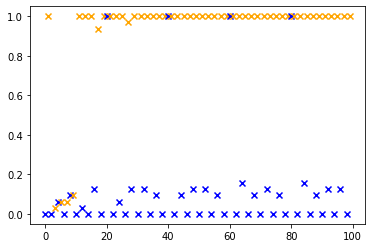

In [16]:
#!/usr/bin/python3 

import math
import matplotlib.pyplot as plt

from Tree import *
from TreeOnur import *
from TreeMichal import *

# helper function to flip a bit written as a string/character
def flip(b):
    assert(b == '0' or b == '1')
    if (b == '0'):
        return '1'
    return '0'

# generates a specified amount of IPs that will get the lowest possible score in the IP tree
def generate_IPs(n):
    ips = []
    init_ip = list('1'*32)
    for i in range(0, n):
        for j in range(0, len(init_ip)):
            if((i % (2**j)) == 0):
                init_ip[j] = flip(init_ip[j])
        
        ip_str = ''
        for octet in range(0, 4):
            offset = octet*8
            octet_str = str(int(''.join(init_ip[offset:offset + 8]), 2))
            ip_str  = ip_str + '.' + octet_str
        #remove the first '.'
        ips.append(ip_str[1:])
    return ips

ips = generate_IPs(50)
#print(ips)
print("There are",len(ips), "ips and", len(set(ips)), "distinct ips.")

tree1 = Tree()
tree2 = TreeMichal()
#tree3 = TreeOnur()
scores = []
fig = plt.figure()
ax = fig.add_subplot()
malicious_ips_num = 5

counter = 0
good_scores = []
bad_scores = []
ratio = len(ips)/malicious_ips_num
for ip in ips:
    #score1,_ = tree1.add(ip)
    score2,_ = tree2.add(ip)
    good_scores.append(score2)
    #score3,_ = tree3.add(ip)
    #print("~~~~~~~~~~~added bening IP", ip, "with score", score2)

    #ax.scatter(2*counter, score1, label='score1, benign', color='green')
    ax.scatter(2*counter, score2, label='score2, benign', color='blue', marker='x')
    #ax.scatter(2*counter, score3, label='score3, benign', color='black', marker='o')
    
    #score1,_ = tree1.add(ips[counter % malicious_ips_num])
    score2,_ = tree2.add(ips[int(counter * ratio) % len(ips)])
    bad_scores.append(score2)
    #print("~~~~~~~~~~~added malicious IP", ips[counter % malicious_ips_num], "with score", score2)
    #score3,_ = tree3.add(ips[counter % malicious_ips_num])
    #ax.scatter(2*counter + 1, score1, label='score1, malicious', color='red')
    ax.scatter(2*counter + 1, score2, label='score2, malicious', color='orange', marker='x')
    #ax.scatter(2*counter + 1, score3, label='score2, malicious', color='yellow', marker='o')
    counter += 1
print("avg good score", sum(good_scores)/len(good_scores))
print("avg bad score", sum(bad_scores)/len(bad_scores))
plt.show()

We make it better by taking the IP similarity score to the power of `P_ip`, which helps a bit, but it seems more like a hack rather than a solution. Specifically, solving the issue with a specific `P_ip` might backfire against honest nodes in some cases. 

The issue is getting worse when we give the attacker 10 different IPs. 

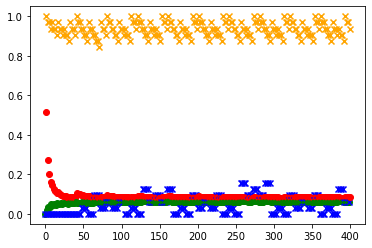

In [8]:
tree1 = Tree()
tree2 = TreeMichal()
#tree3 = TreeOnur()
scores = []
fig = plt.figure()
ax = fig.add_subplot()
malicious_ips_num = 20

counter = 0
for ip in ips:
    score1,_ = tree1.add(ip)
    score2,_ = tree2.add(ip)
    #score3,_ = tree3.add(ip)
    #print("~~~~~~~~~~~added bening IP", ip, "with score", score2)

    ax.scatter(2*counter, score1, label='score1, benign', color='green')
    ax.scatter(2*counter, score2, label='score2, benign', color='blue', marker='x')
    #ax.scatter(2*counter, score3, label='score3, benign', color='black', marker='o')
    
    score1,_ = tree1.add(ips[counter % malicious_ips_num])
    score2,_ = tree2.add(ips[counter % malicious_ips_num])
    #print("~~~~~~~~~~~added malicious IP", ips[counter % malicious_ips_num], "with score", score2)
    #score3,_ = tree3.add(ips[counter % malicious_ips_num])
    ax.scatter(2*counter + 1, score1, label='score1, malicious', color='red')
    ax.scatter(2*counter + 1, score2, label='score2, malicious', color='orange', marker='x')
    #ax.scatter(2*counter + 1, score3, label='score2, malicious', color='yellow', marker='o')
    counter += 1
plt.show()

The question is "what to do about it?". We can change the `max_score` so it's the maximum value possible for this specific tree. However, if we do that, a normal IP in a perfectly balanced tree would yield high ip similarity score which IMO we should avoid. 

A more robust approach might be to use some measure of how the tree is balanced and whether the new IP is increasing or decreasing this balance metric (and by how much).

One idea for the "balance score" would be to take the difference between the max and min possible score and normalize them with the `root_counter`. To investigate. 

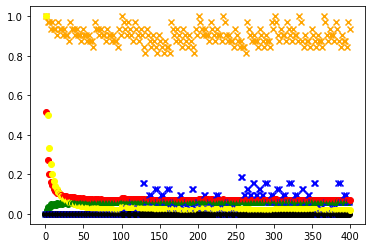

In [9]:
tree1 = Tree()
tree2 = TreeMichal()
tree3 = TreeOnur()
scores = []
fig = plt.figure()
ax = fig.add_subplot()
malicious_ips_num = 50

counter = 0
for ip in ips:
    score1,_ = tree1.add(ip)
    score2,_ = tree2.add(ip)
    score3,_ = tree3.add(ip)
    #print("~~~~~~~~~~~added bening IP", ip, "with score", score2)

    ax.scatter(2*counter, score1, label='score1, benign', color='green')
    ax.scatter(2*counter, score2, label='score2, benign', color='blue', marker='x')
    ax.scatter(2*counter, score3, label='score3, benign', color='black', marker='o')
    
    score1,_ = tree1.add(ips[counter % malicious_ips_num])
    score2,_ = tree2.add(ips[counter % malicious_ips_num])
    #print("~~~~~~~~~~~added malicious IP", ips[counter % malicious_ips_num], "with score", score2)
    score3,_ = tree3.add(ips[counter % malicious_ips_num])
    ax.scatter(2*counter + 1, score1, label='score1, malicious', color='red')
    ax.scatter(2*counter + 1, score2, label='score2, malicious', color='orange', marker='x')
    ax.scatter(2*counter + 1, score3, label='score2, malicious', color='yellow', marker='o')
    counter += 1
plt.show()

There are 100 ips and 100 distinct ips.


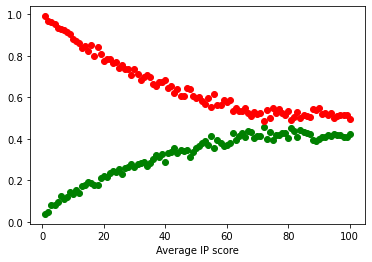

In [29]:
#!/usr/bin/python3 

import math
import matplotlib.pyplot as plt
import random

from Tree import *
from TreeOnur import *
from TreeMichal import *

# helper function to flip a bit written as a string/character
def flip(b):
    assert(b == '0' or b == '1')
    if (b == '0'):
        return '1'
    return '0'

# generates a specified amount of IPs that will get the lowest possible score in the IP tree
def generate_IPs(n):
    ips = []
    init_ip = list('1'*32)
    for i in range(0, n):
        for j in range(0, len(init_ip)):
            if((i % (2**j)) == 0):
                init_ip[j] = flip(init_ip[j])
        
        ip_str = ''
        for octet in range(0, 4):
            offset = octet*8
            octet_str = str(int(''.join(init_ip[offset:offset + 8]), 2))
            ip_str  = ip_str + '.' + octet_str
        #remove the first '.'
        ips.append(ip_str[1:])
    return ips

ips = generate_IPs(100)
print("There are",len(ips), "ips and", len(set(ips)), "distinct ips.")
fig = plt.figure()
ax = fig.add_subplot()

for malicious_ips_num in range(1, len(ips)+1):
    tree1 = Tree()
    tree2 = TreeMichal()
    scores = []
    counter = 0
    good_scores = []
    bad_scores = []
    ratio = len(ips)/malicious_ips_num
    malicious_ips = set()
    while(len(malicious_ips) < malicious_ips_num):
        malicious_ips.add(ips[random.randint(0, len(ips)-1)])
    malicious_ips = list(malicious_ips)

    for ip in ips:
        score2,_ = tree2.add(ip)
        good_scores.append(score2)
       
        score2,_ = tree2.add(malicious_ips[counter % len(malicious_ips)])
        bad_scores.append(score2)
        counter += 1

    ax.scatter(malicious_ips_num/len(ips), sum(good_scores)/len(good_scores), label='good', color='green')
    ax.scatter(malicious_ips_num/len(ips), sum(bad_scores)/len(bad_scores), label='malicious', color='red')

ax.set_xlabel('Malicious IPs/Honest IPs')
ax.set_ylabel('Average IP score')
plt.show()